<a href="https://colab.research.google.com/github/H3nr1que26/Pedro/blob/main/Atividade_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import math
from math import sqrt, pi, exp
from scipy.stats import norm


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve

In [114]:
arquivo = 'https://raw.githubusercontent.com/H3nr1que26/Pedro/main/women_clothing_ecommerce_sales.csv'
dados = pd.read_csv(arquivo)
dados.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


In [115]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


In [116]:
dados.shape

(527, 8)

In [162]:
dados.isna().sum().to_frame('Valor Vazio')

,Valor Vazio
unit_price,0
quantity,0
revenue,0
sku_127,0
sku_1499,0
...,...
size_M,0
size_One SIze,0
size_One Size,0
size_S,0


In [118]:
dados = dados.drop(columns = ['order_date','order_id'])

dados.head()

,sku,color,size,unit_price,quantity,revenue
0,708,Dark Blue,2XL,298,1,298
1,89,Dark Blue,2XL,258,1,258
2,bobo,Cream,One Size,228,1,228
3,799,Dark Blue,XL,264,1,264
4,799,Dark Blue,M,264,1,264


In [119]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sku         527 non-null    object
 1   color       527 non-null    object
 2   size        490 non-null    object
 3   unit_price  527 non-null    int64 
 4   quantity    527 non-null    int64 
 5   revenue     527 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 24.8+ KB


In [120]:
sku = dados['sku'].drop_duplicates()


sku

0        708
1         89
2       bobo
3        799
9        239
20        77
35       897
44      9699
48       127
57      1719
66       439
69      3799
88       229
91      2499
113       79
131       29
170     1499
182      628
184    61399
238      339
270      218
288     8499
315     3081
332      539
Name: sku, dtype: object

In [121]:
color = dados['color'].drop_duplicates()


color

0            Dark Blue
2                Cream
9                Black
15           Navy Blue
16                Blue
17          Light Gray
20                   B
21                   C
22                   D
23                   E
24                   A
35            Mid Wash
44          Light Blue
48           Dark Wash
57           Thin Blue
66                Rust
69           Grey Wash
80          Thin Black
88           922 Black
89      922 Army green
115       Gray Stripes
131      920 Navy blue
151         Light Wash
153       Blue Stripes
186      Black Stripes
234              Green
235              White
236            Mustard
238              Brown
262             Matcha
282               Gray
315      Midnight Blue
327             Maroon
336              Mocha
349           Skintone
392    Cornflower Blue
414             Yellow
415               Pink
428         Red Orange
Name: color, dtype: object

In [122]:
size = dados['size'].drop_duplicates()


size

0           2XL
2      One Size
3            XL
4             M
7           3XL
9           NaN
29            L
113         4XL
131           S
315    One SIze
Name: size, dtype: object

In [123]:

dados = pd.get_dummies(dados,columns=['sku'])

dados.head()

,color,size,unit_price,quantity,revenue,sku_127,sku_1499,sku_1719,sku_218,sku_229,...,sku_628,sku_708,sku_77,sku_79,sku_799,sku_8499,sku_89,sku_897,sku_9699,sku_bobo
0,Dark Blue,2XL,298,1,298,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Dark Blue,2XL,258,1,258,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Cream,One Size,228,1,228,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Dark Blue,XL,264,1,264,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Dark Blue,M,264,1,264,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [124]:

dados = pd.get_dummies(dados,columns=['color'])

dados.head()

,size,unit_price,quantity,revenue,sku_127,sku_1499,sku_1719,sku_218,sku_229,sku_239,...,color_Mustard,color_Navy Blue,color_Pink,color_Red Orange,color_Rust,color_Skintone,color_Thin Black,color_Thin Blue,color_White,color_Yellow
0,2XL,298,1,298,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2XL,258,1,258,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,One Size,228,1,228,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,XL,264,1,264,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,264,1,264,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
dados = pd.get_dummies(dados,columns=['size'])

dados.head()

,unit_price,quantity,revenue,sku_127,sku_1499,sku_1719,sku_218,sku_229,sku_239,sku_2499,...,color_Yellow,size_2XL,size_3XL,size_4XL,size_L,size_M,size_One SIze,size_One Size,size_S,size_XL
0,298,1,298,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,258,1,258,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,228,1,228,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,264,1,264,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,264,1,264,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [126]:
dados

,unit_price,quantity,revenue,sku_127,sku_1499,sku_1719,sku_218,sku_229,sku_239,sku_2499,...,color_Yellow,size_2XL,size_3XL,size_4XL,size_L,size_M,size_One SIze,size_One Size,size_S,size_XL
0,298,1,298,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,258,1,258,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,228,1,228,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,264,1,264,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,264,1,264,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,265,1,265,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
523,278,1,278,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
524,265,1,265,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
525,265,1,265,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [127]:
def color_corr ( value_str ):
  try:
    value = float(value_str)
    if value >= 0.6 or value <= -0.6:
      color = 'red'
    else:
      color = 'black'
  except:
          color = 'black'
  return 'color: %s' % color

In [128]:
dados.corr().style.applymap(color_corr)

,unit_price,quantity,revenue,sku_127,sku_1499,sku_1719,sku_218,sku_229,sku_239,sku_2499,sku_29,sku_3081,sku_339,sku_3799,sku_439,sku_539,sku_61399,sku_628,sku_708,sku_77,sku_79,sku_799,sku_8499,sku_89,sku_897,sku_9699,sku_bobo,color_920 Navy blue,color_922 Army green,color_922 Black,color_A,color_B,color_Black,color_Black Stripes,color_Blue,color_Blue Stripes,color_Brown,color_C,color_Cornflower Blue,color_Cream,color_D,color_Dark Blue,color_Dark Wash,color_E,color_Gray,color_Gray Stripes,color_Green,color_Grey Wash,color_Light Blue,color_Light Gray,color_Light Wash,color_Maroon,color_Matcha,color_Mid Wash,color_Midnight Blue,color_Mocha,color_Mustard,color_Navy Blue,color_Pink,color_Red Orange,color_Rust,color_Skintone,color_Thin Black,color_Thin Blue,color_White,color_Yellow,size_2XL,size_3XL,size_4XL,size_L,size_M,size_One SIze,size_One Size,size_S,size_XL
unit_price,1.000000,-0.021701,0.766968,-0.081126,0.021525,-0.066509,0.134189,-0.121660,-0.064325,-0.087425,-0.060657,-0.218456,-0.010077,-0.035998,-0.021461,-0.012481,0.007675,-0.008817,0.270992,-0.110506,0.145351,0.025990,-0.092097,-0.082889,-0.015301,0.066843,-0.319284,-0.060657,-0.085945,-0.085945,-0.007256,-0.082384,0.099359,-0.034105,-0.140682,-0.048278,-0.097948,-0.079183,-0.097325,-0.117186,-0.030379,0.264297,-0.036252,-0.021461,-0.007256,-0.025254,-0.045593,-0.035998,0.047688,-0.059393,-0.046749,-0.106175,-0.084074,-0.070560,-0.137769,0.016471,-0.037898,-0.111420,-0.059393,-0.059393,-0.032123,0.003827,-0.008817,-0.029197,-0.106724,0.003827,0.120232,0.062759,0.310137,0.007486,0.024562,-0.218456,-0.208675,-0.060657,0.026071
quantity,-0.021701,1.000000,0.619357,-0.008120,-0.006624,-0.013323,-0.012451,-0.006624,-0.018989,-0.009385,-0.004679,-0.010503,-0.009385,-0.014145,-0.004679,-0.006624,-0.009385,-0.004679,-0.051612,-0.018989,-0.014145,0.027906,-0.008120,-0.017067,-0.008120,0.085254,0.085254,-0.004679,-0.004679,-0.004679,-0.008120,-0.011516,0.093495,-0.004679,-0.009385,-0.006624,-0.008120,-0.009385,-0.004679,0.284262,-0.006624,-0.021572,-0.010503,-0.004679,-0.008120,-0.004679,-0.006624,-0.014145,-0.024447,-0.004679,-0.004679,-0.004679,-0.006624,-0.013323,-0.006624,-0.004679,-0.004679,-0.012451,-0.004679,-0.004679,-0.008120,-0.004679,-0.004679,-0.008120,-0.008120,-0.004679,-0.031987,-0.030755,-0.014145,-0.001706,-0.002235,-0.010503,0.095212,-0.004679,0.005131
revenue,0.766968,0.619357,1.000000,-0.067753,0.012393,-0.059787,0.095606,-0.098073,-0.061705,-0.073418,-0.049773,-0.175218,-0.013744,-0.036770,-0.019533,-0.013842,-0.000048,-0.009779,0.176238,-0.097334,0.103139,0.042655,-0.076217,-0.074804,-0.016970,0.110747,-0.211147,-0.049773,-0.069282,-0.069282,-0.010763,-0.070884,0.141406,-0.029288,-0.114505,-0.041459,-0.080731,-0.067059,-0.078061,0.037248,-0.027651,0.195794,-0.034649,-0.019533,-0.010763,-0.022460,-0.039388,-0.036770,0.021240,-0.048797,-0.039043,-0.084890,-0.069076,-0.062911,-0.110501,0.009731,-0.032215,-0.093880,-0.048797,-0.048797,-0.029948,-0.000024,-0.009779,-0.027691,-0.087502,-0.000024,0.072412,0.028855,0.230270,0.006936,0.019764,-0.175218,-0.109086,-0.049773,0.024936
sku_127,-0.081126,-0.008120,-0.067753,1.000000,-0.004670,-0.009394,-0.008779,-0.004670,-0.013389,-0.006617,-0.003299,-0.007405,-0.006617,-0.009974,-0.003299,-0.004670,-0.006617,-0.003299,-0.036391,-0.013389,-0.009974,-0.081488,-0.005725,-0.012033,-0.005725,-0.013389,-0.013389,-0.003299,-0.003299,-0.003299,-0.005725,-0.008120,-0.012500,-0.003299,-0.006617,-0.004670,-0.005725,-0.006617,-0.003299,-0.004670,-0.004670,-0.132227,0.252769,-0.003299,-0.005725,-0.003299,-0.004670,-0.009974,-0.017237,-0.003299,0.576252,-0.003299,-0.004670,0.196885,-0.004670,-0.003299,-0.003299,-0.008779,-0.003299,-0.003299,-0.005725,-0.003299,-0.003299,-0.005725,-0.005725,-0.003299,-0.022553,-0.021685,-0.009974,-0.034568,-0.034797,-0.007405,0.247635,-0.003299,-0.050859
sku_1499,0.021525,-0.006624,0.012393,-0.004670,1.000000,-0.007663,-0.007161,-0.003810,-0.010922,-0.005398,-0.002691,-0.006041,-0.005398,-0.008136,-

In [129]:
objetivo = 'revenue'



In [130]:
X = dados.drop( columns = [objetivo], axis = 1 )
X

,unit_price,quantity,sku_127,sku_1499,sku_1719,sku_218,sku_229,sku_239,sku_2499,sku_29,...,color_Yellow,size_2XL,size_3XL,size_4XL,size_L,size_M,size_One SIze,size_One Size,size_S,size_XL
0,298,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,258,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,228,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,264,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,264,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,265,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
523,278,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
524,265,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
525,265,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [131]:
y = dados[objetivo]
y

0      298
1      258
2      228
3      264
4      264
      ... 
522    265
523    278
524    265
525    265
526    265
Name: revenue, Length: 527, dtype: int64

In [132]:
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = 0.7, random_state = 42 )

In [133]:
X_train

,unit_price,quantity,sku_127,sku_1499,sku_1719,sku_218,sku_229,sku_239,sku_2499,sku_29,...,color_Yellow,size_2XL,size_3XL,size_4XL,size_L,size_M,size_One SIze,size_One Size,size_S,size_XL
282,278,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
358,266,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
254,258,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
437,298,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,264,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,278,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
106,288,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
270,318,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
435,288,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [134]:
LR = LinearRegression().fit(X_train, y_train)

In [135]:
print("Acc Treino:", LR.score(X_train, y_train))
print("Acc Teste:", LR.score(X_test, y_test))

Acc Treino: 1.0
Acc Teste: 0.9875630852038827


In [136]:
y_predito = LR.predict(X_test)
y_predito

array([278.        , 198.        , 264.        , 288.        ,
       268.        , 298.        , 265.        , 265.        ,
       288.        , 275.        , 278.        , 265.        ,
       278.        , 275.        , 266.        , 266.        ,
       154.        , 298.        , 239.        , 225.72068728,
       223.        , 286.20388633, 265.        , 298.        ,
       286.72068728, 298.        , 266.        , 278.        ,
       269.        , 288.        , 265.        , 288.        ,
       266.        , 247.32263957, 278.        , 278.        ,
       294.38409063, 258.        , 269.89520383, 278.        ,
       288.        , 288.        , 278.        , 288.        ,
       266.        , 266.        , 278.        , 298.        ,
       318.        , 278.        , 278.        , 258.        ,
       266.        , 278.        , 266.        , 258.        ,
       288.        , 274.92513578, 265.        , 266.        ,
       288.        , 278.        , 288.        , 269.  

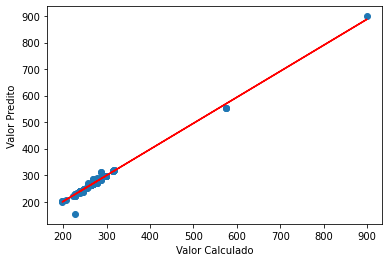

In [137]:
plt.scatter(y_test, y_predito)
plt.xlabel('Valor Calculado')
plt.ylabel('Valor Predito')
z = np.polyfit(y_test, y_predito, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r-")
plt.show();

In [138]:
saida = X.copy()
saida['real'] = y.copy()
saida['predito LR'] = LR.predict(X)
saida['AE'] = np.absolute(saida['real'] - saida['predito LR']) 
saida['MAE'] = metrics.mean_absolute_error(saida['real'], saida['predito LR']) 
saida['MSE'] = metrics.mean_squared_error(saida['real'], saida['predito LR']) 
saida['RMSE'] = np.sqrt(metrics.mean_squared_error(saida['real'], saida['predito LR'])) 
saida['real std'] = np.std(saida['real']) 
saida['predito LR std'] = np.std(saida['predito LR']) 
saida['r2 score'] = metrics.r2_score(saida['real'], saida['predito LR']) 
saida.sort_values(by=['AE'],ascending=False) 

,unit_price,quantity,sku_127,sku_1499,sku_1719,sku_218,sku_229,sku_239,sku_2499,sku_29,...,size_XL,real,predito LR,AE,MAE,MSE,RMSE,real std,predito LR std,r2 score
2,228,1,0,0,0,0,0,0,0,0,...,0,228,154.0,74.0,0.700274,18.623051,4.315443,44.698626,44.269166,0.990679
103,288,2,0,0,0,0,0,0,0,0,...,0,576,553.0,23.0,0.700274,18.623051,4.315443,44.698626,44.269166,0.990679
418,288,2,0,0,0,0,0,0,0,0,...,0,576,553.0,23.0,0.700274,18.623051,4.315443,44.698626,44.269166,0.990679
280,288,2,0,0,0,0,0,0,0,0,...,1,576,553.0,23.0,0.700274,18.623051,4.315443,44.698626,44.269166,0.990679
202,288,1,0,0,0,0,0,0,0,0,...,0,288,311.0,23.0,0.700274,18.623051,4.315443,44.698626,44.269166,0.990679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,266,1,0,0,0,0,0,0,0,0,...,0,266,266.0,0.0,0.700274,18.623051,4.315443,44.698626,44.269166,0.990679
306,266,1,0,0,0,0,0,0,0,0,...,0,266,266.0,0.0,0.700274,18.623051,4.315443,44.698626,44.269166,0.990679
307,266,1,0,0,0,0,0,0,0,0,...,0,266,266.0,0.0,0.700274,18.623051,4.315443,44.698626,44.269166,0.990679
166,266,1,0,0,0,0,0,0,0,0,...,0,266,266.0,0.0,0.700274,18.623051,4.315443,44.698626,44.269166,0.990679


In [142]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.7, random_state=42)

In [151]:
LR  = LogisticRegression(solver='lbfgs', max_iter=1000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT  = DecisionTreeClassifier().fit(train_x, train_y)
KN  = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC().fit(train_x,train_y) 
RF  = RandomForestClassifier().fit(train_x,train_y)

In [166]:
print("Acurácia LR:", LR.score(test_x,test_y), "\n")
print("Acurácia LDA:", LDA.score(test_x,test_y), "\n")
print("Acurácia DT:", DT.score(test_x,test_y), "\n")
print("Acurácia KN:", KN.score(test_x,test_y), "\n")
print("Acurácia SVM:", SVM.score(test_x,test_y), "\n")
print("Acurácia RF:", RF.score(test_x,test_y), "\n")

Acurácia LR: 0.5582655826558266 

Acurácia LDA: 0.3523035230352303 

Acurácia DT: 0.9349593495934959 

Acurácia KN: 0.7804878048780488 

Acurácia SVM: 0.22764227642276422 

Acurácia RF: 0.8563685636856369 

